<a href="https://colab.research.google.com/github/PradeepKumarM30/MLWithLargeData/blob/main/DayB4FatCSVMLMLWLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
import sklearn.datasets
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
import seaborn as sns
import numpy as np

In [256]:
df = pd.read_csv("/content/sample_data/loan.csv")
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [257]:
df.tail(10)

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
9990,9990,19200.0,14.6734,C,Statistician,>5 years,MORTGAGE,46865.0,2013-09-02,0,Debt consolidation,16.0,2015-12-16,NaN
9991,9991,20580.0,12.0442,C,Software developer,>5 years,RENT,47000.0,2015-08-14,0,Debt consolidation,6.0,2016-01-18,NaN
9992,9992,1470.0,12.5900,C,Statistician,<=5 years,RENT,23660.0,2015-12-19,0,Debt consolidation,6.0,2016-01-24,1.0
9993,9993,11640.0,13.3083,C,Other,<=5 years,MORTGAGE,57960.0,2015-01-17,0,Debt consolidation,6.0,2015-12-27,NaN
9994,9994,5520.0,10.6603,B,Accountant,<=5 years,RENT,30380.0,2015-11-17,0,Debt consolidation,12.0,2016-01-20,NaN
9995,9995,23750.0,11.0019,B,Civil Servant,<=5 years,MORTGAGE,98000.0,2010-01-14,0,Other,12.0,2010-11-03,NaN
9996,9996,11880.0,10.4923,B,Civil Servant,<=5 years,RENT,36270.0,2015-03-20,0,Debt consolidation,17.0,2016-01-26,NaN
9997,9997,19950.0,8.4364,B,Accountant,>5 years,OWNER,52250.0,2015-04-03,0,Debt consolidation,9.0,2015-12-12,NaN
9998,9998,4850.0,13.6409,C,Bus driver,>5 years,RENT,80040.0,2014-11-23,0,Debt consolidation,26.0,2016-01-01,NaN
9999,9999,25584.0,17.1456,D,Accountant,>5 years,MORTGAGE,72000.0,2015-01-19,0,Debt consolidation,5.0,2016-01-16,NaN


In [258]:
df.dtypes

customer_id                 int64
disbursed_amount          float64
interest                  float64
market                     object
employment                 object
time_employed              object
householder                object
income                    float64
date_issued                object
target                      int64
loan_purpose               object
number_open_accounts      float64
date_last_payment          object
number_credit_lines_12    float64
dtype: object

In [259]:
df["number_credit_lines_12"].isna().sum()

9762

In [260]:
df["disbursed_amount"].fillna(df["disbursed_amount"].mean())

0       23201.5
1        7425.0
2       11150.0
3        7600.0
4       31960.0
         ...   
9995    23750.0
9996    11880.0
9997    19950.0
9998     4850.0
9999    25584.0
Name: disbursed_amount, Length: 10000, dtype: float64

In [261]:
values = {'employment': 'Other'}
df.fillna(value=values,inplace=True)

In [262]:
values = {'time_employed': 'NA'}
df.fillna(value=values,inplace=True)

In [263]:
df["number_credit_lines_12"].fillna(df["number_credit_lines_12"].mean(),inplace=True)

In [264]:
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,1.785714
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,1.785714
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,1.785714
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,1.785714
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,1.785714


In [265]:
df["market"].value_counts()

B    2846
C    2730
A    1673
D    1577
E    1174
Name: market, dtype: int64

In [266]:
df["market"] = df["market"].astype('category')
df["market_enc"] = df["market"].cat.codes


In [267]:
df["householder"].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [268]:
df["employment"] = df["employment"].astype('category')
df["employment_enc"] = df["employment"].cat.codes

In [269]:
df["time_employed"] = df["time_employed"].astype('category')
df["time_employed_enc"] = df["time_employed"].cat.codes

In [270]:
df['householder'] = df['householder'].apply(lambda val:1 if val == 'MORTGAGE' else (2 if val == 'RENT' else 3)) #point no 3


In [271]:
df["date_issued"] = df["date_issued"].astype('category')
df["date_issued_enc"] = df["date_issued"].cat.codes


In [272]:
df["loan_purpose"] = df["loan_purpose"].astype('category')
df["loan_purpose_enc"] = df["loan_purpose"].cat.codes


In [273]:
df["date_last_payment"] = df["date_last_payment"].astype('category')
df["date_last_payment_enc"] = df["date_last_payment"].cat.codes


In [274]:
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,market_enc,employment_enc,time_employed_enc,date_issued_enc,loan_purpose_enc,date_last_payment_enc
0,0,23201.5,15.4840,C,Teacher,<=5 years,2,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,1.785714,2,10,0,821,1,1057
1,1,7425.0,11.2032,B,Accountant,<=5 years,3,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,1.785714,1,0,0,1111,0,1068
2,2,11150.0,8.5100,A,Statistician,<=5 years,2,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,1.785714,0,8,0,941,1,645
3,3,7600.0,5.8656,A,Other,<=5 years,2,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,1.785714,0,5,0,1526,1,1069
4,4,31960.0,18.7392,E,Bus driver,>5 years,2,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,1.785714,4,1,1,1179,1,1054


In [275]:
df.drop(columns=['employment', 'market','time_employed','date_issued','loan_purpose','date_last_payment'],inplace=True)
df.head()

,customer_id,disbursed_amount,interest,householder,income,target,number_open_accounts,number_credit_lines_12,market_enc,employment_enc,time_employed_enc,date_issued_enc,loan_purpose_enc,date_last_payment_enc
0,0,23201.5,15.4840,2,84600.0,0,4.0,1.785714,2,10,0,821,1,1057
1,1,7425.0,11.2032,3,102000.0,0,13.0,1.785714,1,0,0,1111,0,1068
2,2,11150.0,8.5100,2,69840.0,0,8.0,1.785714,0,8,0,941,1,645
3,3,7600.0,5.8656,2,100386.0,0,20.0,1.785714,0,5,0,1526,1,1069
4,4,31960.0,18.7392,2,95040.0,0,14.0,1.785714,4,1,1,1179,1,1054


In [276]:
df.drop(columns=['customer_id'],inplace=True)

In [277]:
df.head()

,disbursed_amount,interest,householder,income,target,number_open_accounts,number_credit_lines_12,market_enc,employment_enc,time_employed_enc,date_issued_enc,loan_purpose_enc,date_last_payment_enc
0,23201.5,15.4840,2,84600.0,0,4.0,1.785714,2,10,0,821,1,1057
1,7425.0,11.2032,3,102000.0,0,13.0,1.785714,1,0,0,1111,0,1068
2,11150.0,8.5100,2,69840.0,0,8.0,1.785714,0,8,0,941,1,645
3,7600.0,5.8656,2,100386.0,0,20.0,1.785714,0,5,0,1526,1,1069
4,31960.0,18.7392,2,95040.0,0,14.0,1.785714,4,1,1,1179,1,1054


In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["disbursed_amount","interest","householder","income","number_open_accounts","number_credit_lines_12","market_enc","employment_enc","time_employed_enc","date_issued_enc","loan_purpose_enc","date_last_payment_enc"]] = scaler.fit_transform(df[["disbursed_amount","interest","householder","income","number_open_accounts","number_credit_lines_12","market_enc","employment_enc","time_employed_enc","date_issued_enc","loan_purpose_enc","date_last_payment_enc"]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["disbursed_amount","interest","householder","income","number_open_accounts","number_credit_lines_12","market_enc","employment_enc","time_employed_enc","date_issued_enc","loan_purpose_enc","date_last_payment_enc"]] = scaler.fit_transform(df[["disbursed_amount","interest","householder","income","number_open_accounts","number_credit_lines_12","market_enc","employment_enc","time_employed_enc","date_issued_enc","loan_purpose_enc","date_last_payment_enc"]])

In [279]:
df.head()

,disbursed_amount,interest,householder,income,target,number_open_accounts,number_credit_lines_12,market_enc,employment_enc,time_employed_enc,date_issued_enc,loan_purpose_enc,date_last_payment_enc
0,1.125506,0.665558,0.600420,0.246464,0,-1.576408,1.204079e-15,0.183294,1.642731,-1.043558,-0.969525,-0.420531,0.514636
1,-0.832384,-0.350106,2.113194,0.575646,0,0.089535,1.204079e-15,-0.625236,-1.619698,-1.043558,-0.195532,-1.053860,0.563701
2,-0.370105,-0.989096,0.600420,-0.032772,0,-0.835989,1.204079e-15,-1.433765,0.990245,-1.043558,-0.649252,-0.420531,-1.323058
3,-0.810666,-1.616507,0.600420,0.545111,0,1.385269,1.204079e-15,-1.433765,0.011516,-1.043558,0.912077,-0.420531,0.568161
4,2.212451,1.437888,0.600420,0.443973,0,0.274640,1.204079e-15,1.800353,-1.293455,0.662997,-0.014044,-0.420531,0.501255


In [280]:
X_data = df.drop('target',axis=1)
Y_data = df['target']

In [281]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size = 0.3 )

In [282]:
print("X TRaIN SIZE : ",X_train.shape," X TEST SIZE : ",X_test.shape,"Y TRaIN SIZE : ",Y_train.shape,"Y TRaIN SIZE : ",Y_test.shape)

X TRaIN SIZE :  (7000, 12)  X TEST SIZE :  (3000, 12) Y TRaIN SIZE :  (7000,) Y TRaIN SIZE :  (3000,)


In [242]:
X_train

,disbursed_amount,interest,householder,income,number_open_accounts,number_credit_lines_12,market_enc,employment_enc,time_employed_enc,date_issued_enc,loan_purpose_enc,date_last_payment_enc
76,0.811963,-0.896564,-0.912354,-0.482653,-0.280674,1.204079e-15,-1.433765,0.011516,0.662997,-0.846753,-0.420531,-0.970685
5976,-0.830523,-0.003635,-0.912354,-0.843239,-0.095570,1.204079e-15,0.183294,0.990245,0.662997,0.615825,-0.420531,0.416507
5969,-0.800738,-0.068525,-0.912354,-0.455032,-1.021094,1.204079e-15,0.183294,0.011516,2.369551,0.218153,2.746117,0.336219
2569,1.899715,0.073000,-0.912354,-0.228011,-1.021094,1.204079e-15,0.183294,0.011516,0.662997,1.090896,-0.420531,0.501255
829,-0.078529,0.847917,0.600420,-0.464870,-1.206198,1.204079e-15,0.991823,0.337759,-1.043558,0.455689,-0.420531,0.429888
...,...,...,...,...,...,...,...,...,...,...,...,...
1802,-0.502894,2.446435,0.600420,-0.711756,4.717155,1.204079e-15,1.800353,-0.967212,-1.043558,0.888057,-0.420531,0.492334
9171,-1.182972,-1.796445,-0.912354,0.053496,-1.021094,1.204079e-15,-1.433765,0.011516,2.369551,0.936098,1.479458,0.501255
2215,-0.032301,1.682528,2.113194,-0.417574,1.015059,1.204079e-15,0.991823,0.990245,0.662997,-0.427730,-0.420531,0.483413
824,0.529632,0.684159,-0.912354,-0.438687,-0.280674,1.204079e-15,0.183294,-0.314727,0.662997,-0.742665,-0.420531,0.559240


In [169]:
X_train.values

array([[ 0.81196323, -0.89656423, -0.91235388, ..., -0.84675336,
        -0.42053087, -0.97068456],
       [-0.83052276, -0.0036347 , -0.91235388, ...,  0.61582504,
        -0.42053087,  0.4165066 ],
       [-0.80073835, -0.06852542, -0.91235388, ...,  0.21815318,
         2.74611725,  0.33621901],
       ...,
       [-0.03230063,  1.68252754,  2.11319373, ..., -0.42772998,
        -0.42053087,  0.48341293],
       [ 0.52963186,  0.68415949, -0.91235388, ..., -0.74266475,
        -0.42053087,  0.5592401 ],
       [ 0.71230956,  1.19151713, -0.91235388, ...,  0.37295162,
        -0.42053087, -0.46219648]])

Error: 0.011666666666666667
Accuracy: 0.9883333333333333


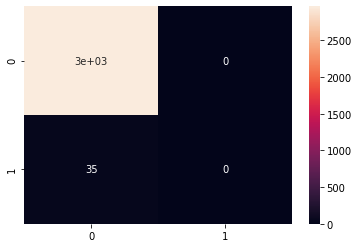

In [ ]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

Error: 0.027
Accuracy: 0.973


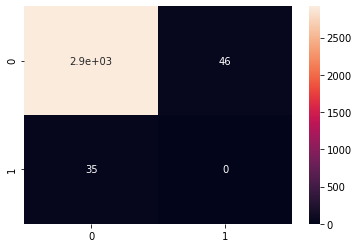

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',splitter='random')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
cnf = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

In [ ]:
df["target"].value_counts()

0    9883
1     117
Name: target, dtype: int64

In [ ]:
from sklearn import datasets


In [ ]:
a = datasets.load_boston()
X = pd.DataFrame(a.data,columns = a.feature_names)
X['class'] = a.target
X.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]] = scaler.fit_transform(X[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]])

In [ ]:
X_data = X.drop('class',axis=1)
Y_data = X['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size = 0.3 )

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes = (50,100,150),activation='relu',solver='adam', learning_rate='adaptive',early_stopping = True,max_iter=300)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))


Error: 13.391293219316193


ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
model = MLPRegressor(hidden_layer_sizes = (50,100,150),activation='relu',solver='adam', learning_rate='adaptive',early_stopping = True,max_iter=300)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print("Error:",mean_squared_error(Y_test, Y_pred))



Error: 10.910939663582127


In [249]:
YSEC = Y_train.values
print(YSEC.shape)

(7000,)


In [250]:

YSEC = YSEC.reshape(-1,1)
print(YSEC.shape)

(7000, 1)


In [283]:
#initialise weight and bias matrix
def initialize_with_zeros(dim):
   
    w = np.zeros((dim,1))
    b = 0
   
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [284]:
#Sigmoid activation utility
def sigmoid(z):
   
    s = 1/(1+(np.exp(-z)))
    
    return s

In [285]:
def binary_activation(z):
  s = np.zeros(z.shape)
  rows = z.shape[0]
  cols = z.shape[1]
  for x in range(0, rows):
    for y in range(0, cols):
         if z[x,y]  >= 0.2: 
           s[x,y] = 1
         else :
           s[x,y] = 0
  return s

In [291]:
#forward and backward propogation
def propagate(w, b, X, Y):
    
    m = 1
    X = X.reshape(-1,1)
    A = sigmoid(np.dot(w.T,X)+b)          
    A = A.reshape(-1,1)
    cost = (-1/m) * (np.dot(Y,(np.log(A)).T) + np.dot(1-Y,(np.log(1-A)).T))                               
    dw = np.dot(X,(A-Y).T)/m
    db = (1/m) * np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [287]:
#doing the computations
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    Y_val = Y.values
    Y_val = Y_val.reshape(-1,1)


    print("x    :",X.values.shape)
    for i in range(num_iterations):
      for row in range(0,100):
        grads,cost = propagate(w,b,X.values[row,:],Y_val[row,:])
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        
        
    
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [334]:
#Perceptron driver code
def perceptron(X_train, Y_train, num_iterations, learning_rate = 0.5):
   
    w,b = initialize_with_zeros(X_train.shape[1])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]

    print(w.shape)
    
#    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train.values[0:100])) * 100))
#    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [335]:
#function to predict models performance
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,100))
   # w = w.reshape(X.shape[0], 1)
    
    A = binary_activation(np.dot(X.values[0:100,:],w)+b)
    Y_prediction = Y_prediction.T
    print("Y_prediction ",Y_prediction.shape)
    print("A ",A.shape)

    

    for i in range(100):
        Y_prediction[i,0] = 1 if A[i,0] > 0.52 else 0
    
    
    return Y_prediction

In [336]:
#the main driver code
print(" M PRADEEP KUMAR - 20MAI0030")
output_dict = perceptron(X_train,Y_train,2,1)
print(output_dict)

 M PRADEEP KUMAR - 20MAI0030
x    : (7000, 12)
(12, 1)
Y_prediction  (100, 1)
A  (100, 1)
train accuracy: 96.06 %
{'costs': [], 'Y_prediction_train': array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
     